# Week2 LAB: Regularization

### 손지우

In [48]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA

In [49]:
data = pd.read_csv('real.csv')
data.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.879                               10   
1                                 306.595                                9   
2                                 561.985                                5   
3                                 561.985                                5   
4                                 390.568                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0       24.983       121.540                        37.9  
1       24.980       121.540                        42.2  
2       24.987       121.544                        47.3  
3       24.987       121.544                        54.8  
4       24.979       121.542                        43.1

In [50]:
data.shape

(414, 8)

In [51]:
data.columns = ['no', 'date', 'hs_age', 'dist_station', 'conv_st', 'latitude', 'longitude', 'price']
data.head()

no      date  hs_age  dist_station  conv_st  latitude  longitude  price
0   1  2012.917    32.0        84.879       10    24.983    121.540   37.9
1   2  2012.917    19.5       306.595        9    24.980    121.540   42.2
2   3  2013.583    13.3       561.985        5    24.987    121.544   47.3
3   4  2013.500    13.3       561.985        5    24.987    121.544   54.8
4   5  2012.833     5.0       390.568        5    24.979    121.542   43.1

In [52]:
data = data.drop('no', axis=1)
data.head()

date  hs_age  dist_station  conv_st  latitude  longitude  price
0  2012.917    32.0        84.879       10    24.983    121.540   37.9
1  2012.917    19.5       306.595        9    24.980    121.540   42.2
2  2013.583    13.3       561.985        5    24.987    121.544   47.3
3  2013.500    13.3       561.985        5    24.987    121.544   54.8
4  2012.833     5.0       390.568        5    24.979    121.542   43.1

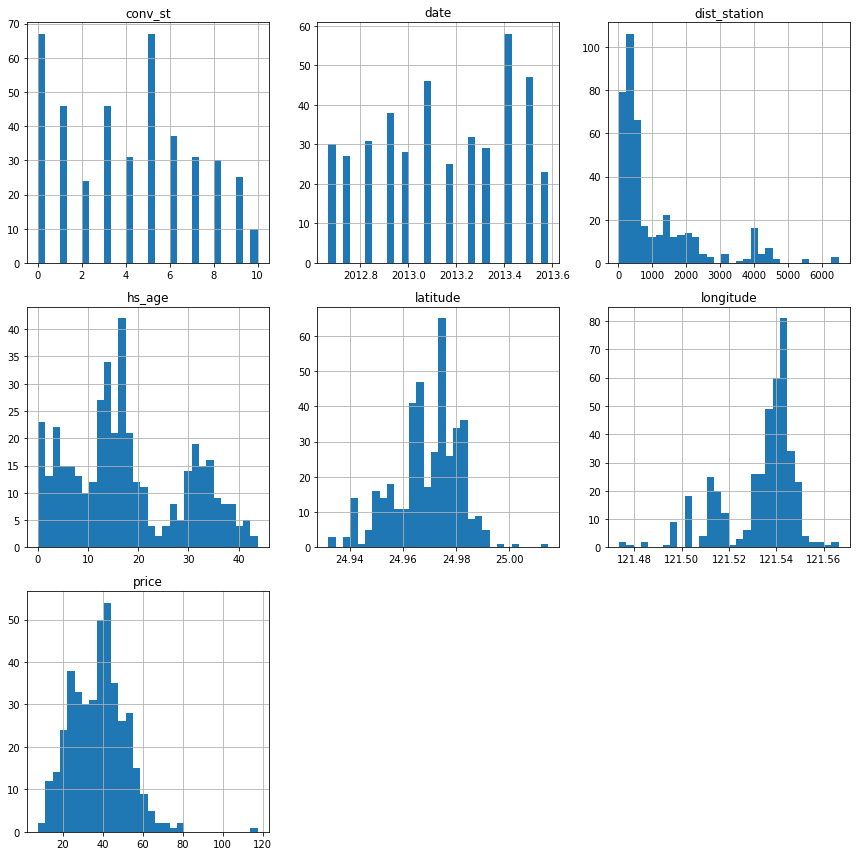

In [53]:
data.hist(bins=30, figsize=(12,12))
plt.tight_layout()
plt.show()

Price의 스케일에 비해, 집의 연식, 역까지의 거리, 주변 편의점 개수 등 X변수로 쓸 만한 것들의 스케일이 중구난방임을 알 수 있다. 이는 추후 정규화를 통해 X변수를 조정해줄 필요가 있다고 보인다.

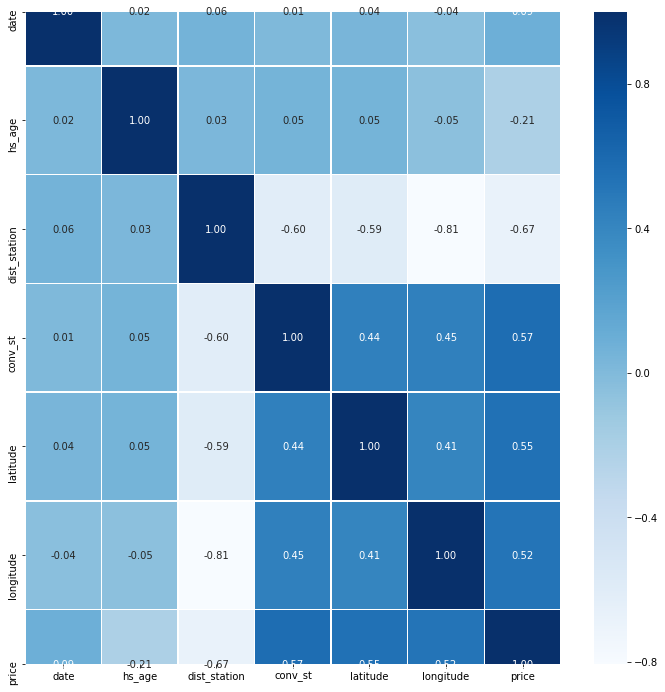

In [54]:
plt.figure(figsize=(12,12))
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

관계성이 높아보이는 변수들끼리만 따로 correlation plot을 그려본다. (단, 경도와 위도 정보는 제외했다)

<Figure size 1080x1080 with 0 Axes>

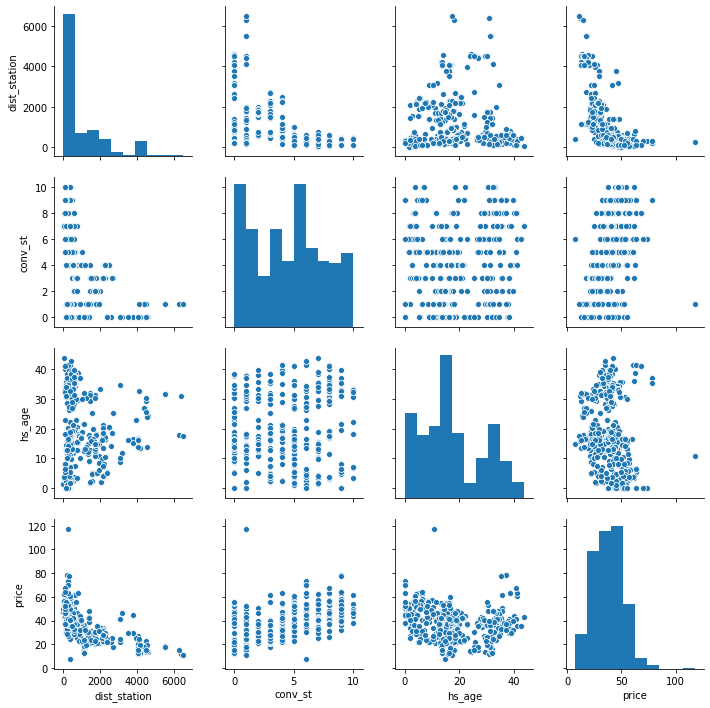

In [55]:
plt.figure(figsize=(15,15))
sns.pairplot(data[['dist_station', 'conv_st', 'hs_age', 'price']])
plt.show()

In [56]:
data.sort_values(by='price').reset_index()

index      date  hs_age  dist_station  conv_st  latitude  longitude  \
0      113  2013.333    14.8       393.261        6    24.962    121.538   
1      347  2013.583    17.4      6488.021        1    24.957    121.474   
2      162  2012.750    16.0      4066.587        0    24.943    121.503   
3      116  2013.000    30.9      6396.283        1    24.944    121.479   
4      330  2013.083    32.0      1156.777        0    24.949    121.530   
..     ...       ...     ...           ...      ...       ...        ...   
409    105  2012.833     0.0       292.998        6    24.977    121.545   
410    166  2013.417     0.0       292.998        6    24.977    121.545   
411    312  2013.583    35.4       318.529        9    24.971    121.541   
412    220  2013.333    37.2       186.510        9    24.977    121.543   
413    270  2013.333    10.8       252.582        1    24.975    121.530   

     price  
0      7.6  
1     11.2  
2     11.6  
3     12.2  
4     12.8  
..     ...  
409   71.0  
410   73.6  
411   78.0  
412   78.3  
413  117.5  

[414 rows x 8 columns]

In [57]:
data2 = data.copy()
data2['dist_station'] = np.log(data2['dist_station'])
data2

date  hs_age  dist_station  conv_st  latitude  longitude  price
0    2012.917    32.0         4.441       10    24.983    121.540   37.9
1    2012.917    19.5         5.726        9    24.980    121.540   42.2
2    2013.583    13.3         6.331        5    24.987    121.544   47.3
3    2013.500    13.3         6.331        5    24.987    121.544   54.8
4    2012.833     5.0         5.968        5    24.979    121.542   43.1
..        ...     ...           ...      ...       ...        ...    ...
409  2013.000    13.7         8.314        0    24.942    121.504   15.4
410  2012.667     5.6         4.505        9    24.974    121.543   50.0
411  2013.250    18.8         5.969        7    24.979    121.540   40.6
412  2013.000     8.1         4.652        5    24.967    121.541   52.5
413  2013.500     6.5         4.505        9    24.974    121.543   63.9

[414 rows x 7 columns]

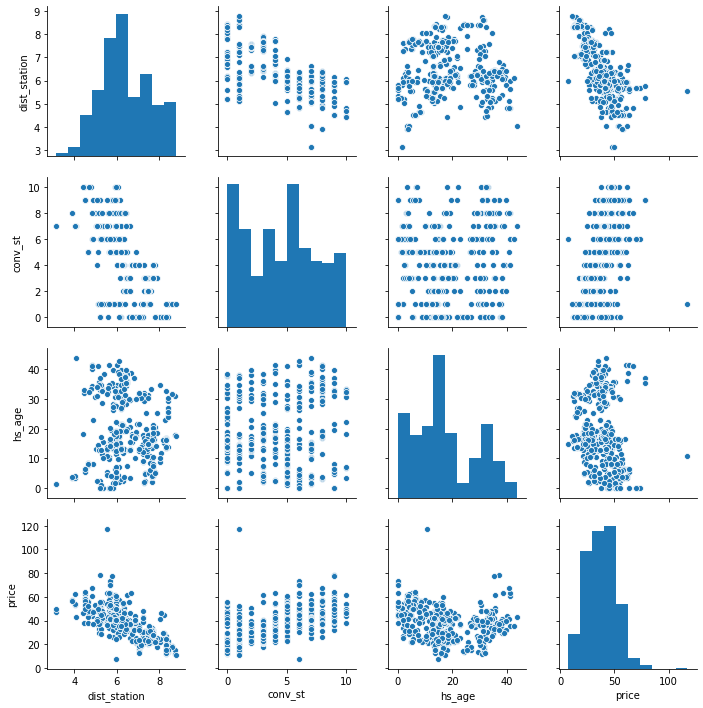

In [58]:
sns.pairplot(data2[['dist_station', 'conv_st', 'hs_age', 'price']])

In [73]:
from sklearn import preprocessing
picked_data = data2[['hs_age', 'dist_station', 'conv_st']]

standardScaler = preprocessing.StandardScaler()

standardized_data = standardScaler.fit(picked_data).transform(picked_data)
standardized_data = pd.DataFrame(standardized_data)
standardized_data.describe()

0          1          2
count  4.140e+02  4.140e+02  4.140e+02
mean  -6.704e-17  4.688e-16 -1.073e-18
std    1.001e+00  1.001e+00  1.001e+00
min   -1.557e+00 -2.897e+00 -1.392e+00
25%   -7.635e-01 -6.475e-01 -1.052e+00
50%   -1.417e-01 -1.724e-01 -3.202e-02
75%    9.173e-01  7.963e-01  6.478e-01
max    2.293e+00  2.133e+00  2.007e+00

In [74]:
standardized_data.columns = ['hs_age', 'dist_station', 'conv_st']
standardized_data

hs_age  dist_station  conv_st
0     1.256        -1.744    2.007
1     0.157        -0.596    1.668
2    -0.388        -0.054    0.308
3    -0.388        -0.054    0.308
4    -1.117        -0.379    0.308
..      ...           ...      ...
409  -0.353         1.719   -1.392
410  -1.064        -1.687    1.668
411   0.096        -0.378    0.988
412  -0.845        -1.555    0.308
413  -0.985        -1.687    1.668

[414 rows x 3 columns]

In [75]:
X = standardized_data
Y = data[['price']]

### Train-Test Split

In [76]:
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [77]:
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train_sc.reset_index(drop=True, inplace=True)
X_test_sc.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

## 2. Polynomial Basis Feature Extraction

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [79]:
poly = PolynomialFeatures(degree=2)
Phi_train = poly.fit_transform(X_train_sc)
Phi_test = poly.fit_transform(X_test_sc)

print(Phi_train.shape)
print(Phi_test.shape)

(289, 10)
(125, 10)


In [80]:
from sklearn.linear_model import LinearRegression

In [84]:
lin = LinearRegression(fit_intercept=False)
lin.fit(Phi_train, Y_train)
print(lin.intercept_)
print(lin.coef_)

0.0
[[37.552 -3.056 -7.826  1.684  1.559  0.957  0.485 -2.367 -2.341 -0.934]]


In [85]:
#test MSE 구해보기
y_pred_test = lin.predict(Phi_test)
mean_squared_error(Y_test, y_pred_test)

109.82329508821714

## 3-1. Ridge Regression

Ridge와 Lasso 모두 sklearn에서 사용하는 방법은 LinearRegression()과 똑같다. 함수를 객체로 불러오고, 람다 계수 정해주고, 그 다음 train set 피팅해서 학습하고 결과는 .coef_로 보고, .predict(테스트 셋) 해서 예측하고.

In [86]:
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)

In [87]:
def Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Ridge?##
    #1. Call Ridge function as an object
    reg = Ridge()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
   
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [[ 0.    -3.056 -7.826  1.684  1.559  0.957  0.485 -2.367 -2.341 -0.934]]


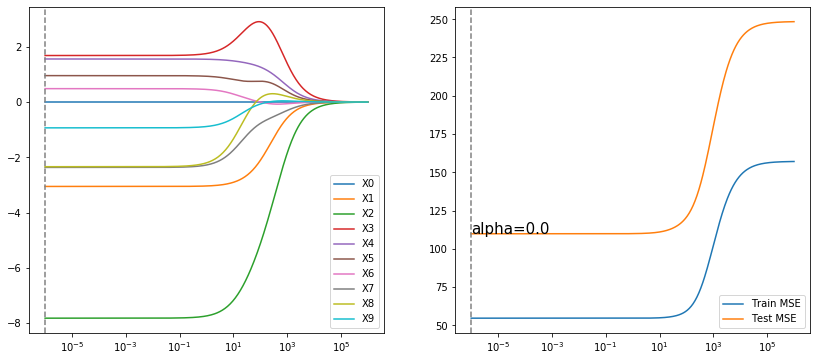

In [88]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

어 왜 intercept 포함해요? 굉장히 좋은 질문이다. Ridge와 Lasso를 할 때 intercept까지 peanalize할지 말지를 결정해야하는데, 흠... 상식적으로 생각해보자. 애초에 Regularization을 하는 이유는 feature는 많지만 데이터가 적어서 생기는 복잡한 모델의 과격한 행동(과민하게 에러까지 먹고 막)을 막기 위해서이다. 그렇다면 feature가 늘수록 intercept가 줄어드는게 맞나? 아니다. 애초에 intercept의 의미는, 우리가 모든 설명변수를 표준화했다면 __모든 설명변수의 값이 평균일 때의 기대되는 종속변수의 값__ 이다. 때문에 intercept는 패널티를 안 주는게 맞다. 밑에 코드에서 인터셉트를 굳이 뺀다고 안하고 Ridge를 돌리면 intercept는 알아서 빼고 나머지 항에 대해서만 정규화를 한다. 그리고 1로만 된 첫 행은 intercept와 겹치니까 그냥 계수가 쭉 0이 된다. https://www.coursera.org/lecture/ml-regression/how-to-handle-the-intercept-3KZiN

## 3-2. Lasso Regression

In [89]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

In [90]:
def Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Lasso?##
    #1. Call Lasso function as an object
    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -3.056 -7.826  1.684  1.559  0.957  0.485 -2.367 -2.341 -0.934]


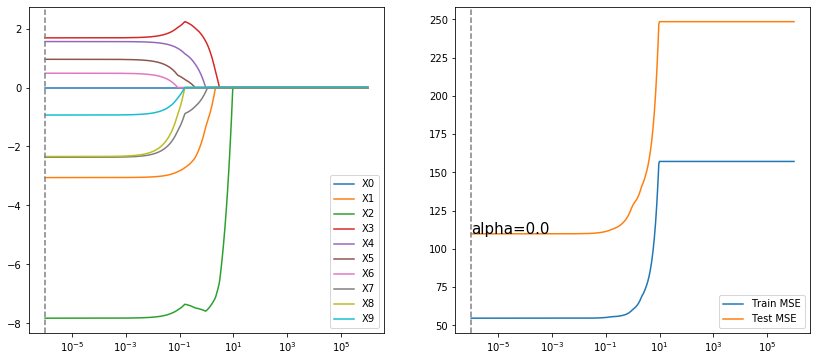

In [91]:
Lasso_output = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

Ridge가 완만하게 계수를 조진다면, Lasso는 화끈하게 쳐내버리는 것을 볼 수 있다.

## 4. k-fold CV for $\lambda$

sklearn에서 kfold 함수는 데이터를 k개의 train-test split으로 나누는 __index를 뱉는다__. 즉 인덱스만 뱉어주므로 직접 그 인덱스가지고 데이터에서 뽑아내는 것은 직접 해야하는 것. 때문에 미리 데이터를 준비하고, Ridge든 뭐든 자체적으로 만든 함수도 준비해서, for 구문 안에서 끝나도록 해보자.

In [92]:
import numpy as np
from sklearn.model_selection import KFold

kcv = KFold(n_splits=5, shuffle=True)

kcvMSE_Ridge = np.zeros((kcv.get_n_splits(), alphas.size))
kcvMSE_Lasso = np.zeros((kcv.get_n_splits(), alphas.size))

i = 0
for train_index, test_index in kcv.split(Phi_train, Y_train):
    print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
    CV_Phi_train, CV_Phi_test = Phi_train[train_index,:], Phi_train[test_index,:]
    CV_Y_train, CV_Y_test = Y_train.iloc[train_index,:], Y_train.iloc[test_index,:]
    
    Ridge_output = Ridge_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Ridge[i, :] = Ridge_output['test_MSE']
    
    Lasso_output = Lasso_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Lasso[i, :] = Lasso_output['test_MSE']
    i += 1

TRAIN: (231,) TEST: (58,)
TRAIN: (231,) TEST: (58,)
TRAIN: (231,) TEST: (58,)
TRAIN: (231,) TEST: (58,)
TRAIN: (232,) TEST: (57,)


Weight: [[ 0.    -2.926 -6.643  3.102  1.086  0.599  0.265 -1.295 -1.06  -1.076]]


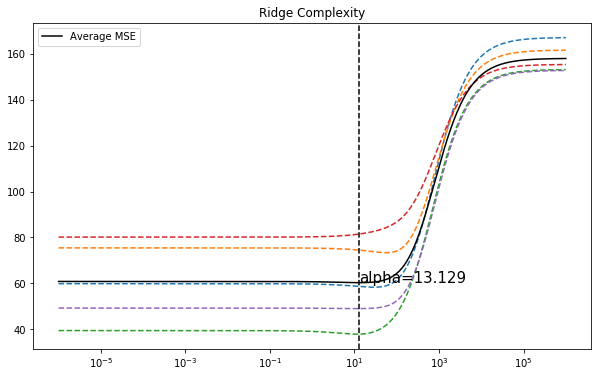

In [93]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Ridge.T)
ax.plot(alphas, kcvMSE_Ridge.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Ridge Complexity')
ax.legend()

coefs = Ridge_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Ridge_alphas = [alphas[np.argmin(meanMSE)]]

Weight: [ 0.    -2.674 -7.104  2.885  0.595  0.    -0.    -0.564 -0.    -0.496]


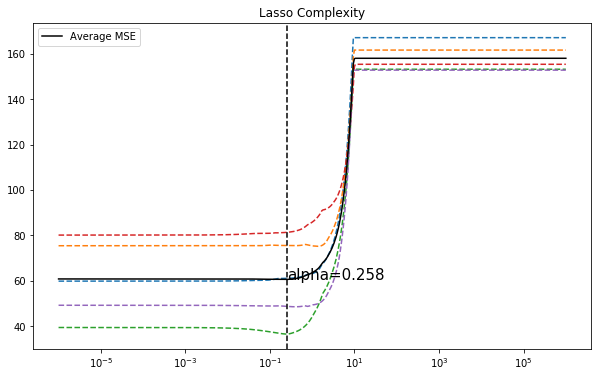

In [94]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Lasso.T)
ax.plot(alphas, kcvMSE_Lasso.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Lasso Complexity')
ax.legend()

coefs = Lasso_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Lasso_alphas = [alphas[np.argmin(meanMSE)]]

## 5. Test MSE

In [95]:
Lasso_output_best = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, Lasso_alphas, fig=False)
print("alpha :", Lasso_alphas)
print("coef :" , Lasso_output_best['coefs'])
print("test_MSE :", Lasso_output_best['test_MSE'])

alpha : [0.2575263326771199]
coef : [array([ 0.   , -2.564, -7.409,  2.137,  0.986,  0.144, -0.   , -0.776,
       -0.   , -0.   ])]
test_MSE : [114.0635282014561]


In [96]:
Ridge_output_best = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, Ridge_alphas, fig=False)
print("alpha :", Ridge_alphas)
print("coef :" , Ridge_output_best['coefs'])
print("test_MSE :", Ridge_output_best['test_MSE'])

alpha : [13.129145852124653]
coef : [array([ 0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.])]
test_MSE : [248.49644293339395]
